In [1]:
import pandas as pd
import vector
import numpy as np
import matplotlib.pyplot as plt  
from bs4 import BeautifulSoup
from particle import Particle
from scipy.interpolate import interp1d
import mplhep as hep
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
m_mu = 0.10566
alpha = 1/137.0359  
GeV_to_pb = 3.894*1e8
GeV_to_nb = GeV_to_pb*1e-3

In [2]:
import ROOT
import glob
import uproot
import matplotlib.pyplot as plt
import vector
import hist


arquivo = "vals_mad/91.lhe"

Welcome to JupyROOT 6.30/04


In [3]:
pts = []   
etas = []  
phis = []  
cos_teta = []  

def calcular_grandezas(px, py, pz, e):
    pt = np.sqrt(px**2 + py**2)  
    phi = np.arctan2(py, px)  
    p = np.sqrt(px**2 + py**2 + pz**2)  
    cos= pz / p  
    eta = -0.5 * np.log((p - pz) / (p + pz))  
    return pt, eta, phi, cos


# Abrindo e processando o arquivo
with open(arquivo, "r") as f:
    for line in f:
        parts = line.strip().split()
        
        # Ignorar linhas que não têm informação suficiente
        if len(parts) < 10:
            continue
        
        # Tentar converter o primeiro elemento (PID) para inteiro
        try:
            pid = int(float(parts[0]))  # PID pode ser formatado como float, então converter para inteiro
        except ValueError:
            continue  # Pular linhas inválidas

        # Filtrar apenas múons (PID = ±13)
        if abs(pid) != 13:
            continue

        # Extrair os 4-momentos
        px = float(parts[6])
        py = float(parts[7])
        pz = float(parts[8])
        e = float(parts[9])

        # Calcular as grandezas
        pt, eta, phi, cos = calcular_grandezas(px, py, pz, e)

        # Armazenar os resultados
        pts.append(pt)
        etas.append(eta)
        phis.append(phi)
        cos_teta.append(cos)



df = pd.DataFrame({
    "pT": pts,
    "eta": etas,
    "phi": phis,
    "cos_teta": cos
})


#print(type(cost))
#print(etas)


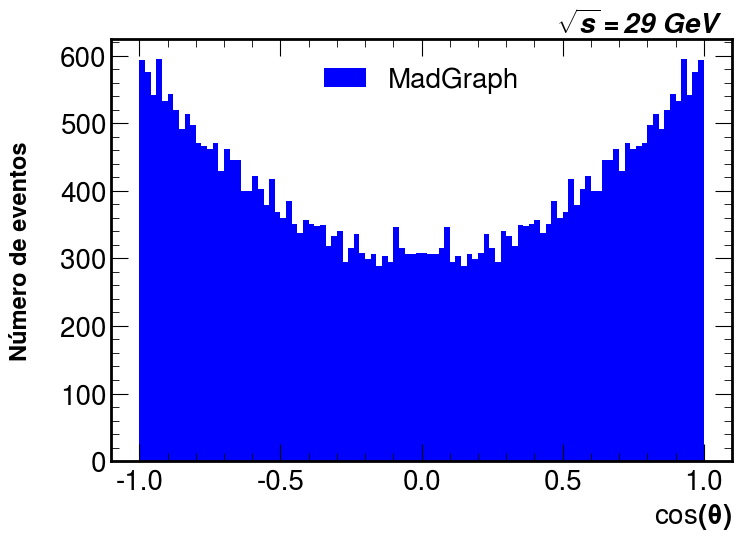

In [4]:
plt.figure(figsize=(8, 6))
hep.style.use('CMS')
plt.hist(cos_teta, bins=100, color='blue', label='MadGraph')




plt.xlabel(r'$\cos(\theta)$', fontsize=20, weight='bold')
#plt.xlabel(r'$\phi$', fontsize=20, weight='bold')
#plt.xlabel(r'$\eta$', fontsize=20, weight='bold')
#plt.xlabel(r'$\mathbf{P_T}$ (GeV)', fontsize=20, weight='bold')


plt.ylabel('Número de eventos', fontsize=17, weight='bold', labelpad=20, loc='center')
#plt.yscale('log')


plt.text(0.85, 1, r'$\sqrt{s} = 29$ GeV', fontsize=20, ha='center', va='bottom', 
         transform=plt.gca().transAxes, style='italic', weight='bold')

# Ajustes nos ticks
plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.legend(fontsize=20)
#plt.savefig("pt_202.png", dpi=300) 

plt.show()


In [5]:
s = 29**2

In [6]:
def diferencial_seccao_transversal(x):
    return ((alpha)**2 * np.pi /(2*s)) *(1 + x**2)

x = np.linspace(-1, 1, 1000)
resultado = diferencial_seccao_transversal(x) * GeV_to_nb * s



In [7]:
#29 GeV-SLAC
# Dados de COS(THETA) e S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
cos_theta_1 = np.array([-0.925, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 
                      0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.925])

# Valores de S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
d_sig_d_cos_1 = np.array([67.08, 58.67, 54.66, 51.72, 43.7, 41.12, 39.71, 35.34, 33.35, 34.69, 
                        34.05, 34.48, 34.66, 35.23, 35.6, 40.13, 42.56, 46.37, 49.28, 55.7])

# Erros associados aos valores de S*D(SIG)/D(COS(THETA)) [NB*GEV**2]
errors_1 = np.array([4.08, 1.94, 1.86, 1.77, 1.64, 1.56, 1.58, 1.51, 1.52, 1.6, 1.59, 
                   1.55, 1.48, 1.46, 1.41, 1.53, 1.53, 1.63, 1.68, 3.42])



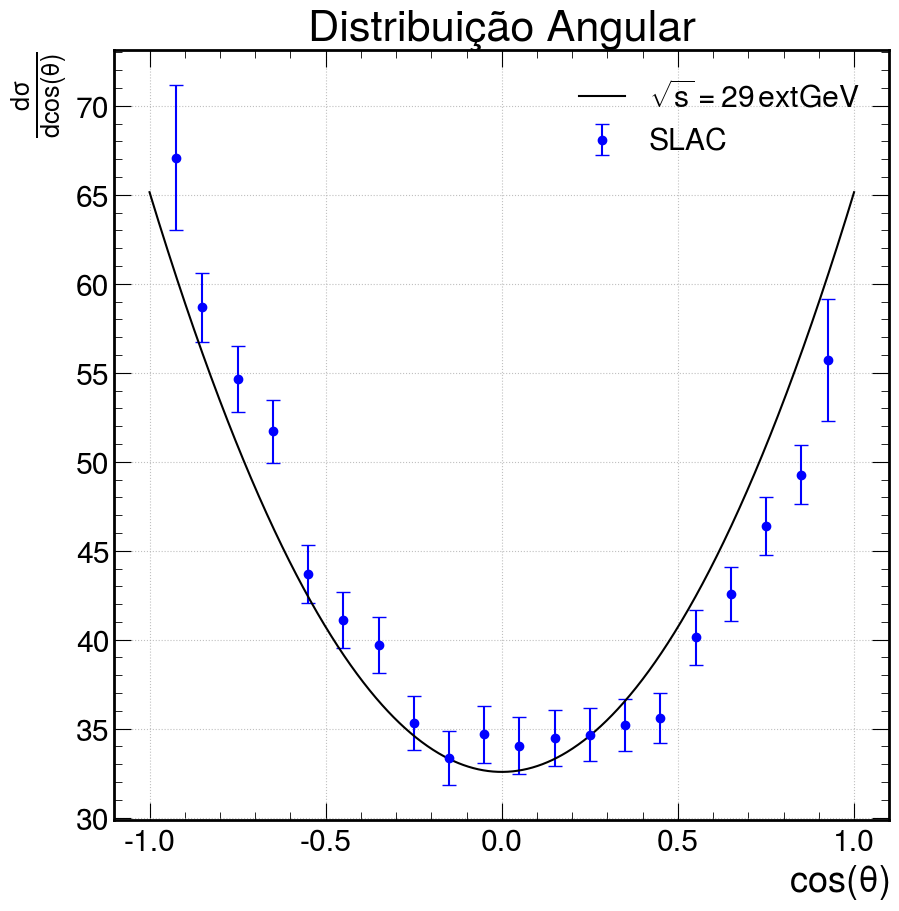

In [8]:


def d_sigma_dcos(cos_t):
    return (alpha**2 * np.pi / (2 * s)) * (1 + cos_t**2)


cos_mad = np.array(cos_teta)
d_sigma_mad = d_sigma_dcos(cos_mad)*GeV_to_nb*s

 
#plt.bar(cos_mad, d_sigma_mad, color='darkorange', linestyle='-', zorder=5, label='MadGraph')

#plt.scatter(cos_mad, d_sigma_mad, color='darkorange', edgecolor='black', zorder=5, label='MadGraph')  
plt.errorbar(cos_theta_1, d_sig_d_cos_1, yerr=errors_1, fmt='o', color='blue', label='SLAC', capsize=5)
plt.plot(x, resultado, label='$\sqrt{s} = 29 \, \text{GeV}$', color='black')


plt.xlabel(r"$\cos(\theta)$")
plt.ylabel(r"$\frac{d\sigma}{d\cos(\theta)}$")
plt.title("Distribuição Angular")
plt.legend()
plt.grid()
plt.show()


In [9]:

# Listas para armazenar os resultados dos múons
pt_1 = []   # Momento transverso
eta_1 = []  # Pseudorrapidez
phi_1 = []  # Ângulo azimutal

# Função para calcular as grandezas
def calcular_grandezas(px, py, pz, e):
    pt = np.sqrt(px**2 + py**2)  # Momento transverso
    phi = np.arctan2(py, px)  # Ângulo azimutal
    eta = -0.5 * np.log((np.sqrt(px**2 + py**2 + pz**2) - pz) / (np.sqrt(px**2 + py**2 + pz**2) + pz))  # Pseudorrapidez
    return pt, eta, phi



# Abrindo e processando o arquivo
with open(arquivo, "r") as f:
    for line in f:
        parts = line.strip().split()
        
        # Ignorar linhas que não têm informação suficiente
        if len(parts) < 10:
            continue
        
        # Tentar converter o primeiro elemento (PID) para inteiro
        try:
            pid = int(float(parts[0]))  # PID pode ser formatado como float, então converter para inteiro
        except ValueError:
            continue  # Pular linhas inválidas

        # Processar apenas as partículas com PID = 13 (múons positivos)
        if pid == 13:  # Verifica se é um múon positivo
            try:
                px = float(parts[6])
                py = float(parts[7])
                pz = float(parts[8])
                e = float(parts[9])
            except ValueError:
                continue 
            
            # Calcular as grandezas
            pt, eta, phi = calcular_grandezas(px, py, pz, e)

            # Armazenar os resultados
            pt_1.append(pt)
            eta_1.append(eta)
            phi_1.append(phi)


# Criar um DataFrame com os resultados
df_1 = pd.DataFrame({
    "pT": pt_1,
    "eta": eta_1,
    "phi": phi_1
})


In [10]:
pt_2 = []   
eta_2 = []  
phi_2 = []  


# Abrindo e processando o arquivo
with open(arquivo, "r") as f:
    for line in f:
        parts = line.strip().split()
        
        # Ignorar linhas que não têm informação suficiente
        if len(parts) < 10:
            continue
        
        # Tentar converter o primeiro elemento (PID) para inteiro
        try:
            pid = int(float(parts[0]))  # PID pode ser formatado como float, então converter para inteiro
        except ValueError:
            continue  # Pular linhas inválidas


        if pid == -13:  # Verifica se é um múon positivo
            try:
                px = float(parts[6])
                py = float(parts[7])
                pz = float(parts[8])
                e = float(parts[9])
            except ValueError:
                continue 
            
            # Calcular as grandezas
            pt, eta, phi = calcular_grandezas(px, py, pz, e)

            # Armazenar os resultados
            pt_2.append(pt)
            eta_2.append(eta)
            phi_2.append(phi)

# Criar um DataFrame com os resultados
df_2 = pd.DataFrame({
    "pT": pt_2,
    "eta": eta_2,
    "phi": phi_2
})


In [11]:
mu_1 = vector.zip({'pt': pt_1,
                      'eta': eta_1,
                      'phi': phi_1,
                      'mass': m_mu})

mu_2 = vector.zip({'pt': pt_2,
                      'eta': eta_2,
                      'phi': phi_2,
                      'mass': m_mu})

di_muon = mu_1 + mu_2
di_muon_mass = di_muon.mass
#print(di_muon)
#print(di_muon_mass)

Text(0, 1, 'Número de eventos')

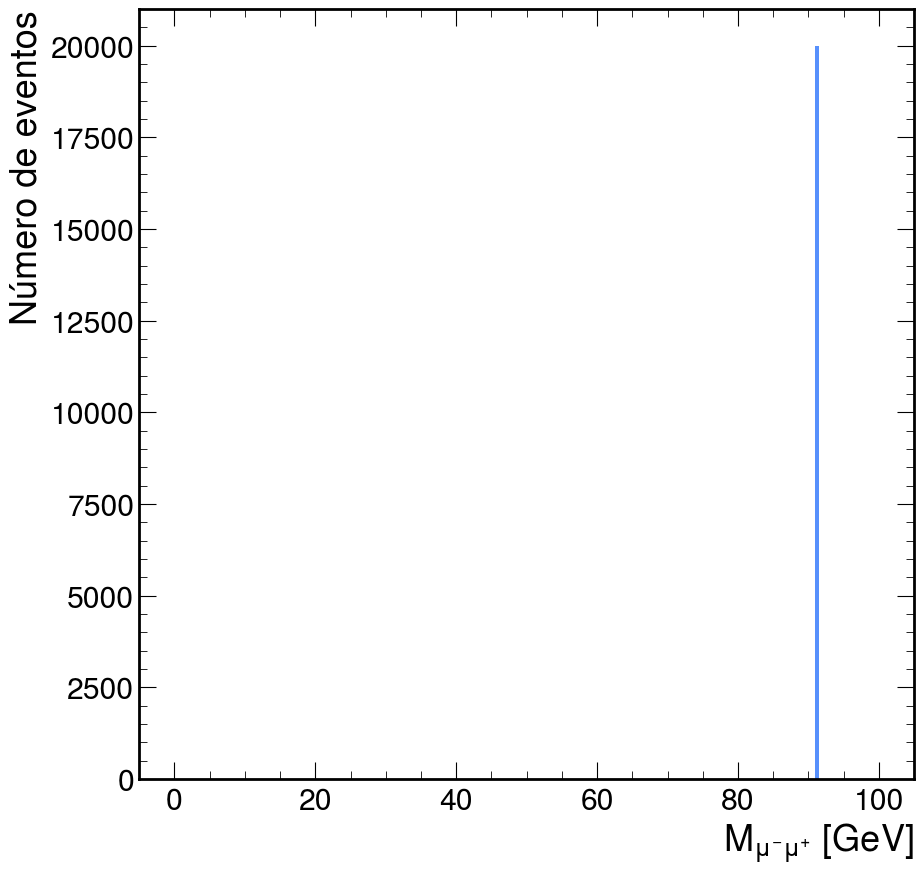

In [12]:

bins = np.linspace(0, 100, 200)
mass_hist = hist.Hist(hist.axis.Variable(bins, label=r'$M_{\mu^{-}\mu^{+}}$ [GeV]'))

mass_hist.fill(di_muon.mass)
hep.style.use('CMS')
hep.histplot(mass_hist, histtype='fill')

plt.ylabel('Número de eventos')

#plt.yscale('log')

